In [50]:
import os
import sys
import time
import numpy as np
import matplotlib.pyplot as plt

def plot_power_span(mode=0, logscale=False):
    plt.figure()
    plt.xlabel("Time (s)", fontsize=12)
    plt.ylabel("Power (W)", fontsize=12)

    # Get max peak power per simulation
    peak_power = []
    for s in range(len(dataset.simulations)):
        simulation = dataset.simulations[s]
        if mode == 0:
            P_max = np.max(simulation.powers)
        else:
            P_max = np.max(simulation.peak_power_densities)
        peak_power.append(P_max)
    d = max(peak_power)/min(peak_power) - 1.0
    print(f"Peak % Difference:\t\t{d*100.0:.3f}%")

    # Plot min/max max peak powers over the space
    styles = ['-*b', '-or']
    argmin = int(np.argmin(peak_power))
    argmax = int(np.argmax(peak_power))
    for i, s in enumerate([argmax, argmin]):
        simulation = dataset.simulations[s]
        if mode == 0:
            P = simulation.powers
        else:
            P = simulation.peak_power_densities
        plotter = plt.semilogy if logscale else plt.plot
        plotter(dataset.times, P, styles[i])
    plt.grid(True)
    plt.tight_layout()

    # Get the peak power densities
    P_max = dataset.simulations[argmax].peak_power_densities
    P_min = dataset.simulations[argmin].peak_power_densities

    # Find the second peak, compare
    count_max, count_min = 0, 0
    argmax, argmin = 0, 0
    for i in range(len(P_max)):
        if i > 0 and i < len(P_max):
            if P_max[i-1] < P_max[i] and P_max[i+1] < P_max[i]:
                count_max += 1
                if count_max == 2:
                    argmax = i
            if P_min[i-1] < P_min[i] and P_min[i+1] < P_min[i]:
                count_min += 1
                if count_min == 2:
                    argmin = i
        if count_max == count_min == 2:
            break
    d = P_max[argmax]/P_min[argmin] - 1.0
    print(f"Second Peak % Difference:\t{d*100.0:.3f}%")

def plot_temperature_span(mode=0, logscale=False):
    plt.figure()
    plt.xlabel("Time (s)", fontsize=12)
    plt.ylabel("Temperature (K)", fontsize=12)

    peak_temperature = []
    for s in range(len(dataset.simulations)):
        simulation = dataset.simulations[s]
        T_peak = np.max(simulation.peak_temperatures)
        peak_temperature.append(T_peak)

    styles = ['-*b', '-or']
    argmin = int(np.argmin(peak_temperature))
    argmax = int(np.argmax(peak_temperature))
    for i, s in enumerate([argmax, argmin]):
        simulation = dataset.simulations[s]
        if mode == 0:
            T = simulation.average_temperatures
        else:
            T = simulation.peak_temperatures
        plotter = plt.semilogy if logscale else plt.plot
        plotter(dataset.times, T, styles[i])
    plt.grid(True)
    plt.tight_layout()

def plot_power_densities():
    for s in [0, -1]:
        simulation = dataset.simulations[s]
        simulation.plot_power_densities([0.0, dataset.times[-1]])
        if problem == 'infinite_slab':
            fname = "/Users/zacharyhardy/Documents/phd/dissertation/dissertation/" \
                    "figures/chapter7/"
            fname += "min_solution.pdf" if s == 0 else "max_solution.pdf"
            plt.savefig(fname)

Parse the Data

In [22]:
from utils import *

problem = 'lra'
case = 1
study = 6

print("Loading and formating the data...")
t_start = time.time()
if problem == 'infinite_slab':
    dataset = get_data(problem, case, study)
else:
    dataset = get_data(problem, study)
t_end = time.time()
print(f"Loading the data took {t_end - t_start:3f} s")

Loading and formating the data...
Loading the data took 113.580258 s


Plot Stuff

Peak % Difference:		43.294%
Second Peak % Difference:	54.298%
Peak % Difference:		43.294%
Second Peak % Difference:	54.298%


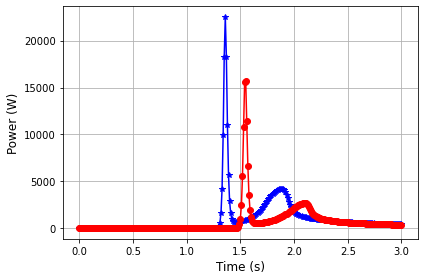

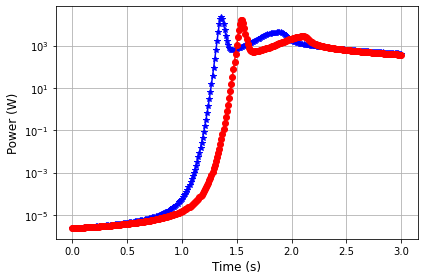

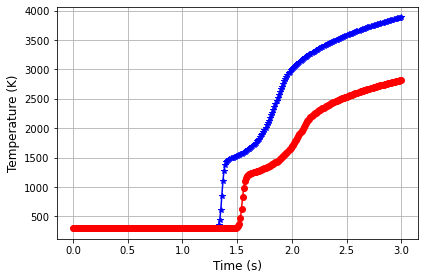

In [51]:
if problem == 'three_group_sphere':
    plot_power_span()

    ax = plt.gca()
    lines = ax.get_lines()
    r_b = dataset.parameters[[0, -1], 0]
    for l, line in enumerate(lines):
        line.set_label(f"{r_b[l]:.5f} cm")
    ax.set_xlabel("Time ($\mu$s)", fontsize=12)
    ax.legend()

elif problem == 'infinite_slab':
    plot_power_densities()
    plot_power_span()
    plt.savefig("/Users/zacharyhardy/Documents/phd/dissertation/"
                "dissertation/figures/chapter7/power_span.pdf")

elif problem == 'twigl':
    plot_power_span()
    plt.savefig("/Users/zacharyhardy/Documents/phd/dissertation/"
                "dissertation/figures/chapter8/power_span.pdf")

elif problem == 'lra':
    plot_power_span(mode=1, logscale=False)
    plt.savefig("/Users/zacharyhardy/Documents/phd/dissertation/"
                "dissertation/figures/chapter9/power_span.pdf")
    plot_power_span(mode=1, logscale=True)
    plt.savefig("/Users/zacharyhardy/Documents/phd/dissertation/"
                "dissertation/figures/chapter9/log_power_span.pdf")
    plot_temperature_span(mode=1)
    plt.savefig("/Users/zacharyhardy/Documents/phd/dissertation/"
                "dissertation/figures/chapter9/temperature_span.pdf")